In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate
import tensorflow as tf

In [ ]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
#reshape data from 3-D to 2-D array
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
x_train = minmax.fit_transform(x_train)
#transform testing dataset
x_test = minmax.transform(x_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


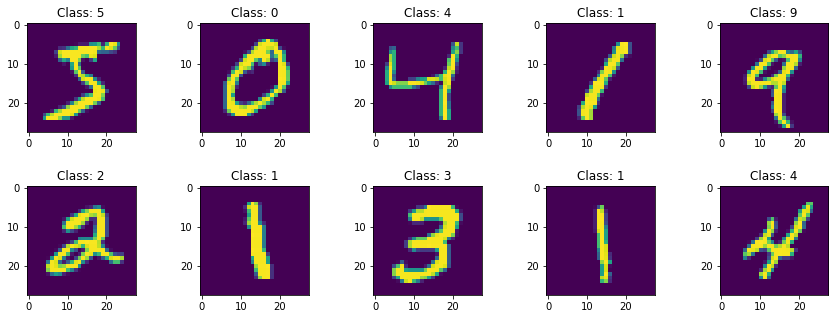

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = 0.20, random_state = 35)

print(x_train.shape)
print(x_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [ ]:
# reshaping them as matrix

x_train = np.asmatrix(x_train).reshape(48000, 784)
x_cv = np.asmatrix(x_cv).reshape(12000, 784)

x_test = np.asmatrix(x_test).reshape(10000, 784)

In [ ]:
# feature normalization

x_train = x_train.astype('float32')
x_cv = x_cv.astype('float32')

x_test = x_test.astype('float32')

x_train = x_train/255
x_cv = x_cv/255
x_test = x_test/255

In [ ]:
# converting the labels into one hot encoding

# immporting keras 
import keras

digits = 10
y_train = keras.utils.to_categorical(y_train, digits)
y_cv = keras.utils.to_categorical(y_cv, digits)

In [ ]:
print(y_train[0])  #6

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(activation = "relu", input_dim = 784, units = 400, kernel_initializer = "uniform"))

# second hidden layer
model.add(Dense(activation = "relu", units = 300, kernel_initializer = "uniform"))

# third hidden layer
model.add(Dense(activation = "relu", units = 300, kernel_initializer = "uniform"))

# fourth hidden layer
model.add(Dense(activation = "relu", units = 300, kernel_initializer = "uniform"))

# fifth hidden layer
model.add(Dense(activation = "relu", units = 100, kernel_initializer = "uniform"))

# output layer
# output_dim = no. of digits
# softmax activation function is used for multiple outputs
model.add(Dense(activation = "softmax", units = 10, kernel_initializer = "uniform"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 300)               120300    
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 646,010
Trainable params: 646,010
Non-trai

In [ ]:
from keras import optimizers

In [ ]:
# # setting the learning rate
# learning_rate = 0.5
# sgd = optimizers.SGD(lr = learning_rate)


# # compiling the model
# # using the plain vanilla stochastic gradient descent as our optimizing technique
# # using categorical cross entropy for multiple outputs
# model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# # feeding the training data to the model
# model.fit(x_train, y_train, batch_size = 100, epochs = 60, verbose = 2, validation_data = (x_cv, y_cv))

In [ ]:
# setting the learning rate
learning_rate = 0.01
adam = optimizers.Adam(lr = learning_rate)


# compiling the model
# using the plain vanilla stochastic gradient descent as our optimizing technique
# using categorical cross entropy for multiple outputs
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# feeding the training data to the model
history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, verbose = 2, validation_data = (x_cv, y_cv))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
480/480 - 10s - loss: 1.7452 - accuracy: 0.2950 - val_loss: 1.3504 - val_accuracy: 0.4160 - 10s/epoch - 20ms/step
Epoch 2/20
480/480 - 5s - loss: 1.0519 - accuracy: 0.5997 - val_loss: 0.7518 - val_accuracy: 0.7452 - 5s/epoch - 10ms/step
Epoch 3/20
480/480 - 4s - loss: 0.6494 - accuracy: 0.7834 - val_loss: 0.5553 - val_accuracy: 0.8227 - 4s/epoch - 9ms/step
Epoch 4/20
480/480 - 7s - loss: 0.4649 - accuracy: 0.8589 - val_loss: 0.3913 - val_accuracy: 0.8843 - 7s/epoch - 14ms/step
Epoch 5/20
480/480 - 5s - loss: 0.3460 - accuracy: 0.8981 - val_loss: 0.3292 - val_accuracy: 0.9052 - 5s/epoch - 10ms/step
Epoch 6/20
480/480 - 8s - loss: 0.2875 - accuracy: 0.9156 - val_loss: 0.2847 - val_accuracy: 0.9193 - 8s/epoch - 17ms/step
Epoch 7/20
480/480 - 6s - loss: 0.2452 - accuracy: 0.9286 - val_loss: 0.2599 - val_accuracy: 0.9257 - 6s/epoch - 13ms/step
Epoch 8/20
480/480 - 6s - loss: 0.2174 - accuracy: 0.9367 - val_loss: 0.2807 - val_accuracy: 0.9259 - 6s/epoch - 12ms/step
Epoch 9/20
480/

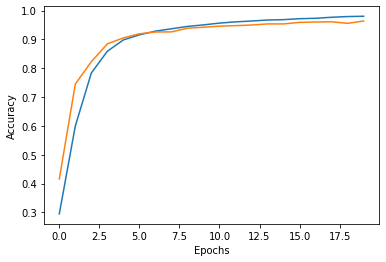

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

#with sparse categorical cross entropy

In [ ]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
from matplotlib import scale
#reshape data from 3-D to 2-D array
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#fit and transform training dataset
x_train = sc.fit_transform(x_train)
#transform testing dataset
x_test = sc.transform(x_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


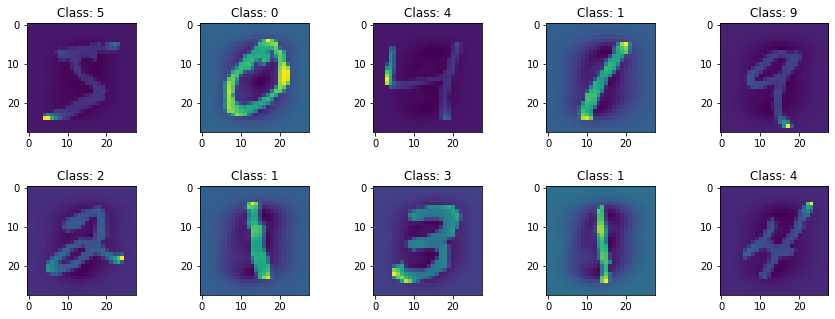

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = 0.20, random_state = 35)

print(x_train.shape)
print(x_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [ ]:
# reshaping them as matrix

x_train = np.asmatrix(x_train).reshape(48000, 784)
x_cv = np.asmatrix(x_cv).reshape(12000, 784)

x_test = np.asmatrix(x_test).reshape(10000, 784)

In [ ]:
# feature normalization

x_train = x_train.astype('float32')
x_cv = x_cv.astype('float32')

x_test = x_test.astype('float32')

x_train = x_train/255
x_cv = x_cv/255
x_test = x_test/255

In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(activation = "relu", input_dim = 784, units = 400, kernel_initializer = "uniform"))

# second hidden layer
model.add(Dense(activation = "relu", units = 300, kernel_initializer = "uniform"))

# third hidden layer
model.add(Dense(activation = "relu", units = 300, kernel_initializer = "uniform"))

# fourth hidden layer
model.add(Dense(activation = "relu", units = 300, kernel_initializer = "uniform"))

# fifth hidden layer
model.add(Dense(activation = "relu", units = 100, kernel_initializer = "uniform"))

# output layer
# output_dim = no. of digits
# softmax activation function is used for multiple outputs
model.add(Dense(activation = "softmax", units = 10, kernel_initializer = "uniform"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dense_7 (Dense)             (None, 300)               120300    
                                                                 
 dense_8 (Dense)             (None, 300)               90300     
                                                                 
 dense_9 (Dense)             (None, 300)               90300     
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 646,010
Trainable params: 646,010
Non-tr

In [ ]:
from keras import optimizers

In [ ]:
# # setting the learning rate
# learning_rate = 0.5
# sgd = optimizers.SGD(lr = learning_rate)


# # compiling the model
# # using the plain vanilla stochastic gradient descent as our optimizing technique
# # using categorical cross entropy for multiple outputs
# model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# # feeding the training data to the model
# model.fit(x_train, y_train, batch_size = 100, epochs = 60, verbose = 2, validation_data = (x_cv, y_cv))

In [ ]:
# setting the learning rate
learning_rate = 0.01
adam = optimizers.Adam(lr = learning_rate)


# compiling the model
# using the plain vanilla stochastic gradient descent as our optimizing technique
# using categorical cross entropy for multiple outputs
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# feeding the training data to the model
history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, verbose = 2, validation_data = (x_cv, y_cv))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
480/480 - 7s - loss: 1.2495 - accuracy: 0.5172 - val_loss: 0.6649 - val_accuracy: 0.7697 - 7s/epoch - 14ms/step
Epoch 2/20
480/480 - 5s - loss: 0.3883 - accuracy: 0.8830 - val_loss: 0.2652 - val_accuracy: 0.9292 - 5s/epoch - 10ms/step
Epoch 3/20
480/480 - 5s - loss: 0.1917 - accuracy: 0.9471 - val_loss: 0.1965 - val_accuracy: 0.9463 - 5s/epoch - 10ms/step
Epoch 4/20
480/480 - 5s - loss: 0.1264 - accuracy: 0.9646 - val_loss: 0.1767 - val_accuracy: 0.9513 - 5s/epoch - 9ms/step
Epoch 5/20
480/480 - 5s - loss: 0.0927 - accuracy: 0.9721 - val_loss: 0.1505 - val_accuracy: 0.9584 - 5s/epoch - 10ms/step
Epoch 6/20
480/480 - 5s - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.1629 - val_accuracy: 0.9554 - 5s/epoch - 11ms/step
Epoch 7/20
480/480 - 5s - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.1512 - val_accuracy: 0.9611 - 5s/epoch - 10ms/step
Epoch 8/20
480/480 - 5s - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.1512 - val_accuracy: 0.9621 - 5s/epoch - 11ms/step
Epoch 9/20
480/48

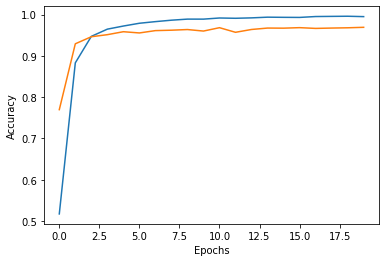

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

#Cat vs dog dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [20]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [21]:
classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

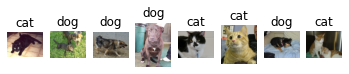

In [22]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

In [23]:
HEIGHT = 200
WIDTH = 200

In [24]:
def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label

In [25]:
trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

In [26]:
trainDataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [27]:
# Define the ANN model for image classification
modelann = keras.Sequential([
    keras.layers.Flatten(input_shape=(200, 200, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
# Experiment with different activation functions and loss functions
modelann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(trainDataset, epochs=5, validation_data=testDataset)

Epoch 1/5
509/509 [==============================] - 123s 239ms/step - loss: 1.8553 - accuracy: 0.5307 - val_loss: 0.6644 - val_accuracy: 0.6167
Epoch 2/5
509/509 [==============================] - 121s 238ms/step - loss: 0.7711 - accuracy: 0.5703 - val_loss: 0.7000 - val_accuracy: 0.5658
Epoch 3/5
509/509 [==============================] - 119s 234ms/step - loss: 0.6666 - accuracy: 0.6023 - val_loss: 0.7467 - val_accuracy: 0.5423
Epoch 4/5
509/509 [==============================] - 126s 248ms/step - loss: 0.6709 - accuracy: 0.5968 - val_loss: 0.6737 - val_accuracy: 0.5934
Epoch 5/5
509/509 [==============================] - 117s 230ms/step - loss: 0.6662 - accuracy: 0.5998 - val_loss: 0.7352 - val_accuracy: 0.5796


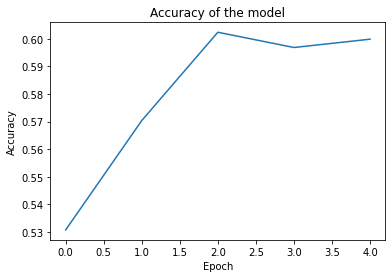

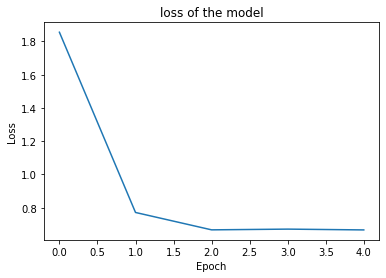

In [29]:
# Plot the model's accuracy and loss over time
plt.plot(history.history['accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('loss of the model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#Traffic sign dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
train_df = pd.read_csv("/content/drive/MyDrive/annotations.csv")

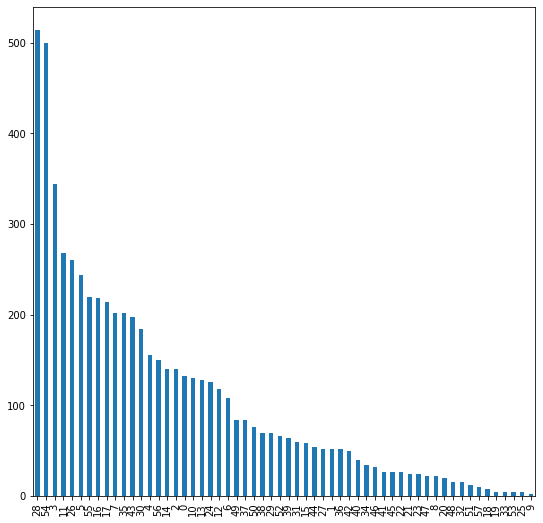

In [37]:
plt.figure(figsize=(9,9))
train_df['category'].value_counts().plot(kind='bar')
plt.show()

In [38]:
train_df['category'] = train_df['category'].astype('str')

In [39]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True
            )

In [40]:
 # Train generator
train_generator = datagen.flow_from_dataframe(
            dataframe=train_df,
            directory="/content/drive/MyDrive/Data/Chinese-Traffic-Sign/images",
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="training",
            batch_size=16,
            seed=42,
            shuffle=True,
            class_mode="categorical",
            target_size=(28,28))
print('Train generator created')

Found 0 validated image filenames belonging to 0 classes.
Train generator created


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 6164 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  warnings.warn(


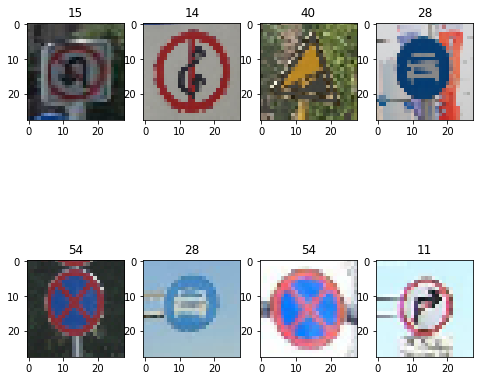

In [ ]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(8,8))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [ ]:
# Validation generator
val_generator = datagen.flow_from_dataframe(
            dataframe=train_df,
            directory='/content/drive/MyDrive/Data/Chinese-Traffic-Sign/images',
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="validation",
            batch_size=16,
            seed=42,
            shuffle=False,
            class_mode="categorical",
            target_size=(28,28)) 

Found 616 validated image filenames belonging to 58 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense ,Flatten 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam 

optimizer=Adam(learning_rate=0.001)
EarlyStop=EarlyStopping(patience=2,restore_best_weights=True)

In [ ]:
# Define the ANN model for image classification
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(58, activation='softmax')
])

In [ ]:
## compile the model
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
## saved History
history=model.fit(train_generator,validation_data=val_generator,epochs=5,batch_size=16,verbose=1)

Epoch 1/5
386/386 [==============================] - 1050s 3s/step - loss: 2.9743 - accuracy: 0.2472 - val_loss: 2.2930 - val_accuracy: 0.3442
Epoch 2/5
386/386 [==============================] - 24s 63ms/step - loss: 1.8724 - accuracy: 0.4740 - val_loss: 1.5860 - val_accuracy: 0.5714
Epoch 3/5
386/386 [==============================] - 26s 67ms/step - loss: 1.4113 - accuracy: 0.5943 - val_loss: 1.1331 - val_accuracy: 0.6656
Epoch 4/5
386/386 [==============================] - 24s 63ms/step - loss: 1.1548 - accuracy: 0.6650 - val_loss: 0.7923 - val_accuracy: 0.7987
Epoch 5/5
386/386 [==============================] - 23s 60ms/step - loss: 0.9532 - accuracy: 0.7140 - val_loss: 0.7901 - val_accuracy: 0.7630


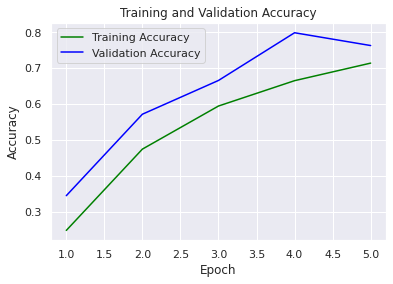

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.show()

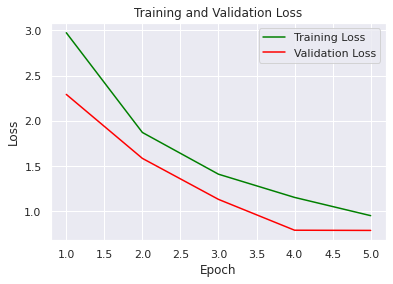

In [ ]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(val_generator)

39/39 [==============================] - 2s 48ms/step


In [ ]:
predictions

array([[1.1827901e-01, 4.4153482e-03, 6.6910632e-02, ..., 2.1829978e-03,
        1.4666858e-03, 4.2651191e-05],
       [2.8418356e-01, 1.6139939e-02, 2.6919138e-01, ..., 2.4418687e-03,
        3.5294928e-03, 6.5885135e-05],
       [1.3062018e-01, 2.8381285e-03, 1.3944873e-01, ..., 1.2069513e-03,
        6.6128415e-03, 2.3837545e-05],
       ...,
       [4.2914876e-09, 7.5986434e-10, 1.4115882e-10, ..., 8.4942377e-07,
        4.2072066e-09, 3.2218928e-08],
       [4.4320441e-09, 5.0319127e-10, 3.1650016e-11, ..., 4.9827054e-07,
        1.8254828e-09, 3.5533510e-08],
       [4.4320441e-09, 5.0319127e-10, 3.1650016e-11, ..., 4.9827054e-07,
        1.8254828e-09, 3.5533510e-08]], dtype=float32)